# **Libraries**

In [48]:
import pandas as pd
import numpy as np

from feature_engine.selection import DropCorrelatedFeatures
from sklearn.feature_selection import mutual_info_classif
from feature_engine.imputation import RandomSampleImputer

import functions
import importlib
importlib.reload(functions)

import warnings

# **Display**

In [3]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_rows', 200)

size = 20

# **Data**

## **Load Data**

In [38]:
app_train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\application_train.csv",
    index_col=False
)

# **Variables**

In [39]:
data = app_train.copy()
random_state = 101
target = 'TARGET'

# **Correlations**

## **Label Encoder**

In [40]:
data_type = 'object'

data = functions.label_encoder(data, data_type)

### **Random Sample Imputer**

In [22]:
# rsi = RandomSampleImputer()
# rsi.fit(data)
# data_engineered = rsi.transform(data)

## **Correlation Coefficient**

In [41]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix[target].sort_values(ascending=False)

TARGET                          1.000000
DAYS_BIRTH                      0.078239
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055218
NAME_EDUCATION_TYPE             0.054699
CODE_GENDER                     0.054692
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
NAME_INCOME_TYPE                0.046829
FLAG_EMP_PHONE                  0.045982
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
DAYS_REGISTRATION               0.041975
EMERGENCYSTATE_MODE             0.041955
HOUSETYPE_MODE                  0.040211
OWN_CAR_AGE                     0.037612
WALLSMATERIAL_MODE              0.037076
NAME_HOUSING_TYPE               0.034489
LIVE_CITY_NOT_WORK_CITY         0.032518
DEF_30_CNT_SOCIAL_CIRCLE        0.032248
DEF_60_CNT_SOCIAL_CIRCLE        0.031276
FLAG_WORK_PHONE                 0.028524
FONDKAPREMONT_MODE              0.026924
AMT_REQ_CREDIT_B

## **Spearman Correlation**

In [42]:
functions.spearman_correlation(data, target)

                          Feature  Spearman Correlation
30    REGION_RATING_CLIENT_W_CITY              0.064043
12            NAME_EDUCATION_TYPE              0.058018
29           REGION_RATING_CLIENT              0.056226
17                  DAYS_EMPLOYED              0.054218
20                    OWN_CAR_AGE              0.052992
96                FLAG_DOCUMENT_3              0.052391
16                     DAYS_BIRTH              0.048413
11               NAME_INCOME_TYPE              0.036332
120    AMT_REQ_CREDIT_BUREAU_YEAR              0.033373
2                     CODE_GENDER              0.033249
19                DAYS_ID_PUBLISH              0.030369
88             WALLSMATERIAL_MODE              0.029976
90       OBS_30_CNT_SOCIAL_CIRCLE              0.029763
92       OBS_60_CNT_SOCIAL_CIRCLE              0.029005
14              NAME_HOUSING_TYPE              0.025330
93       DEF_60_CNT_SOCIAL_CIRCLE              0.024699
91       DEF_30_CNT_SOCIAL_CIRCLE              0

## **Drop Collinear Features**

In [43]:
dcf = DropCorrelatedFeatures(threshold=0.7)
data = dcf.fit_transform(data)

## **New Data**

In [44]:
data.shape

(307511, 78)

## **Mutual Information Plot**

This plot shows the predicitve power of each feature.

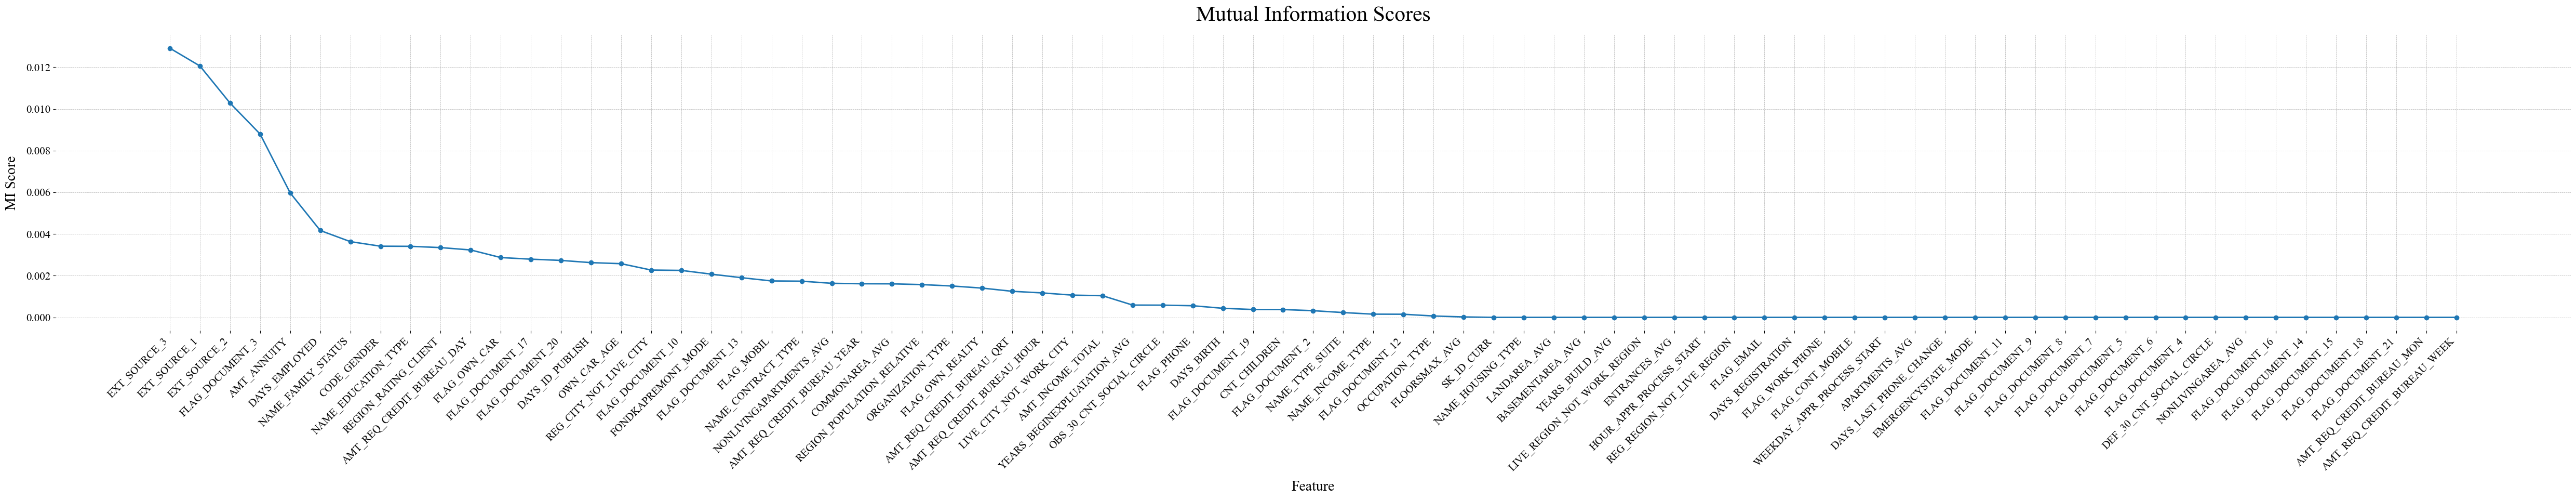

In [49]:
features = data.drop(columns=['TARGET'])
target = data['TARGET']

features = features.dropna()
target = target[features.index] 
features = pd.get_dummies(features, drop_first=True)

mi_scores = mutual_info_classif(features, target)
functions.create_plot_mi_scores(features, mi_scores)